In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from pathlib import Path

%matplotlib inline

In [2]:
from models import *
from data.data_classes import *

In [3]:
# Configs
index = 42

batch_size = 50
num_ctx_frames = 5
num_tgt_frames = 5

input_channels=3
num_hidden=[64, 64, 64]
kernel_size=5
stride=1
learning_rate=1e-3

ckpt_path = Path("./logs/PredRNN_RGB/version_0/checkpoints/epoch=10-step=693.ckpt")
model = PredRNN(input_channels=input_channels,
                num_hidden=num_hidden,
                num_ctx_frames=num_ctx_frames,
                num_tgt_frames=num_tgt_frames,
                kernel_size=kernel_size,
                stride=stride,
                learning_rate=1e-3)


In [4]:
# Prepare trained model
model = model.load_from_checkpoint(ckpt_path)

TypeError: PredRNN.__init__() missing 6 required positional arguments: 'input_channels', 'num_hidden', 'num_ctx_frames', 'num_tgt_frames', 'kernel_size', and 'stride'

In [12]:
rgb_movingmnist = TwoColourMovingMNISTDataModule(batch_size, num_ctx_frames, num_tgt_frames)
rgb_movingmnist.setup()

train_dataloader = rgb_movingmnist.train_dataloader()
for train_x_batch, train_y_batch in train_dataloader:
    break

train_x_batch.shape  # bs x C x F x H x W

torch.Size([50, 3, 5, 128, 128])

In [15]:
model.eval()

y_pred = model(train_x_batch[index:index+1])

(array([239208.,    893.,    669.,    557.,    503.,    594.,    555.,
           599.,    872.,   1310.]),
 array([0.        , 0.09960784, 0.19921568, 0.29882354, 0.39843136,
        0.49803922, 0.5976471 , 0.6972549 , 0.7968627 , 0.8964706 ,
        0.99607843], dtype=float32),
 <BarContainer object of 10 artists>)

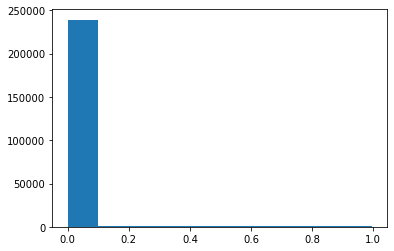

In [35]:
plt.hist(train_x_batch[index:index+1].flatten())

(array([239003.,    924.,    692.,    583.,    514.,    615.,    576.,
           623.,    899.,   1331.]),
 array([0.        , 0.09960784, 0.19921568, 0.29882354, 0.39843136,
        0.49803922, 0.5976471 , 0.6972549 , 0.7968627 , 0.8964706 ,
        0.99607843], dtype=float32),
 <BarContainer object of 10 artists>)

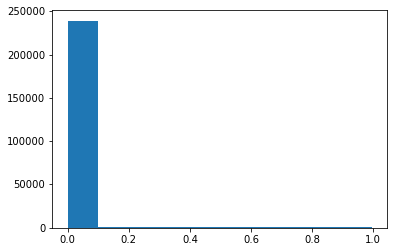

In [36]:
plt.hist(train_y_batch[index:index+1].detach().numpy().flatten())

(array([2.20000e+01, 1.80000e+02, 5.64000e+02, 1.33200e+03, 1.08360e+04,
        8.27470e+04, 1.41904e+05, 7.16500e+03, 9.76000e+02, 3.40000e+01]),
 array([-3.5708227 , -2.9811969 , -2.3915708 , -1.8019449 , -1.2123189 ,
        -0.62269294, -0.03306699,  0.55655897,  1.1461849 ,  1.7358109 ,
         2.3254368 ], dtype=float32),
 <BarContainer object of 10 artists>)

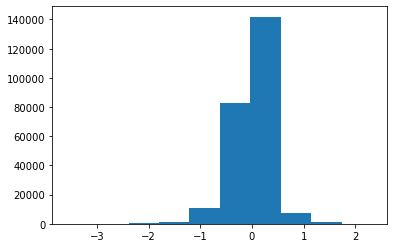

In [18]:
plt.hist(y_pred.detach().numpy().flatten())

In [38]:
y_pred.shape

torch.Size([1, 3, 5, 128, 128])